# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

### Arctic Penguin Exploration

**Unraveling Clusters in the Icy Domain with K-means Clustering**

**Dataset Origin:** Data collected by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER.

**Dataset Description:**
The dataset includes measurements of penguins from three species (Adelie, Chinstrap, and Gentoo) in the Antarctic region. The columns are:
- Culmen length (mm)
- Culmen depth (mm)
- Flipper length (mm)
- Body mass (g)
- Sex

**Key Steps and Findings:**

1. **Data Loading and Cleaning:**
   - Imported the dataset and examined its structure.
   - Checked for and handled missing values by dropping incomplete records.
   - Identified and removed outliers based on flipper length measurements.

2. **Preprocessing:**
   - Created dummy variables for categorical data.
   - Scaled the dataset using StandardScaler for normalization.

3. **Principal Component Analysis (PCA):**
   - Applied PCA to understand the variance in the dataset and to reduce dimensionality.
   - Selected the number of components based on explained variance ratio.

4. **K-means Clustering:**
   - Performed K-means clustering to identify groups within the dataset.
   - Visualized the clustering results to interpret and validate the clusters.

This analysis helps in identifying natural groupings within the penguin species based on their physical characteristics, aiding in better understanding of their traits and behaviors.

In [29]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

In [30]:
# Exploratory Analysis
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [31]:
# Check for missing values
penguins_df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [32]:
# Handling missing values 
penguins_df = penguins_df.dropna()
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

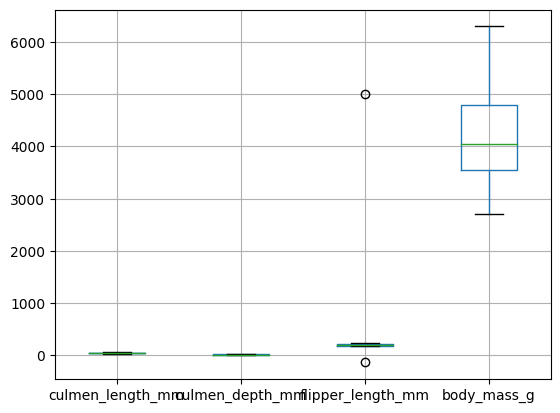

In [33]:
# Visualize outliers using boxplot
penguins_df.boxplot()
plt.show()

In [34]:
# Finding the index ofthe outliers
idx1 =penguins_df[penguins_df['flipper_length_mm'] > 4000]
idx2 =penguins_df[penguins_df['flipper_length_mm'] < 0]
idx1, idx2

(   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
 9              42.0             20.2             5000.0       4250.0  MALE,
     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
 14              34.6             21.1             -132.0       4400.0  MALE)

In [35]:
# Removing the outliers
penguins_clean = penguins_df.drop([9,14])

In [36]:
# Perform preprocessing to create dummy variables
df = pd.get_dummies(penguins_clean).drop('sex_.', axis = 1)

In [37]:
# Preprocessing for scaling
scaler = StandardScaler()
p_dataset = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(p_dataset, columns= df.columns)
penguins_preprocessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001


In [38]:
# Performing PCA
pca = PCA()
df_pca = pca.fit(penguins_preprocessed)
df_pca.explained_variance_ratio_
n_components = sum(df_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components = n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

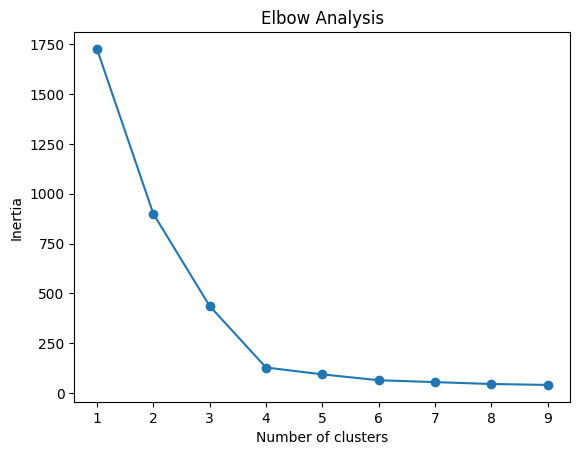

In [39]:
# Finding number of clusters
inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(penguins_PCA)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1,10), inertias, marker= "o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Analysis")
plt.show()



In [40]:
# Detect the optimal number of clusters
n_clusters = 4

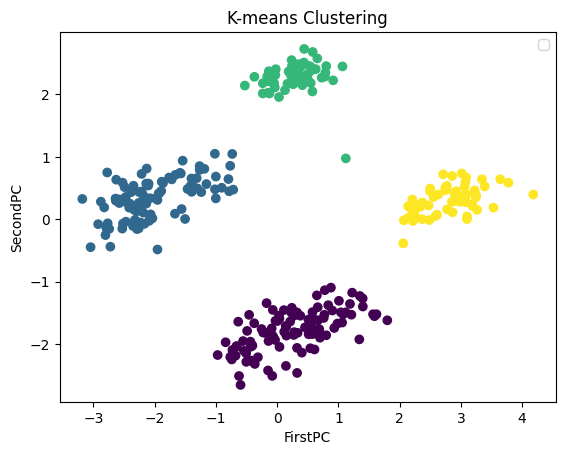

In [41]:
# Run k-means clustering algo
kmeans = KMeans(n_clusters = n_clusters, random_state =42).fit(penguins_PCA)

# Visualize the clusters
plt.scatter(penguins_PCA[:,0], penguins_PCA[:,1], c = kmeans.labels_, cmap='viridis')
plt.xlabel('FirstPC')
plt.ylabel('SecondPC')
plt.title('K-means Clustering')
plt.legend()
plt.show()


In [42]:
# Final statistical dataframe for each cluster
penguins_clean['label'] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,45.545763,14.262712,212.779661
3,49.473770,15.718033,221.540984
